<a href="https://colab.research.google.com/github/dfrnks/py-memory-game/blob/linear-network-training/MemoryGame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
def printIndfoGames(title, df):
    winning = df[df['done']==True]
    
    c = df.sort_values('points').groupby(['id'])
    
    c = (pd.concat([c.tail(1)])
       .drop_duplicates()
       .sort_values('points')
       .reset_index(drop=True)).sort_values('time')
    
    # plt.plot(c['time'], c['points'], label='Pontuação Maxima',  marker="*", color='r')
    # plt.plot(winning['time'], winning['points'], label='Pontuação final',  marker="o")
    # plt.title(f'Total de pontos - {title}', fontsize=36)
    # plt.xticks(fontsize=18)
    # plt.yticks(fontsize=18)
    # plt.gcf().set_size_inches(24, 8)
    # plt.legend(fontsize=18)
    # plt.show()
    

    plt.hist(c['points'], 20, label='Pontuação Maxima', color='r')
    plt.hist(winning['points'], 20, label='Pontuação final')
    # plt.title(f'Média Pontos - {title}', fontsize=36)
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    plt.gcf().set_size_inches(24, 8)
    plt.legend(fontsize=24)
    plt.show()


    # plt.plot(c['time'], c['reward'], label='Recompensa Maxima')
    # plt.title(f'Total de Recompensas - {title}', fontsize=36)
    # plt.xticks(fontsize=18)
    # plt.yticks(fontsize=18)
    # plt.gcf().set_size_inches(24, 8)
    # plt.legend(fontsize=18)
    # plt.show()

    # plt.hist(c['reward'], 20, label='Recompensa Maxima')
    # plt.hist(winning['reward'], 20, label='Recompensa final')
    # plt.title(f'Recompensas - {title}', fontsize=36)
    # plt.xticks(fontsize=18)
    # plt.yticks(fontsize=18)
    # plt.gcf().set_size_inches(24, 8)
    # plt.legend(fontsize=18)
    # plt.show()
    
    c = df.groupby(['id']).size().reset_index(name='counts')
    
    
    plt.hist(c['counts'], 20)
    # plt.title(f'Quantidade de jogadas por jogo - {title}', fontsize=36)

    plt.axvline(c['counts'].mean(), color='k', linestyle='dashed', linewidth=5)
    
    min_ylim, max_ylim = plt.ylim()
    plt.text(c['counts'].mean()*1.1, max_ylim*0.9, 'Média: {:.0f}'.format(c['counts'].mean()), fontsize=24)

    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    plt.gcf().set_size_inches(24, 8)
    plt.show()
    
    # if 'n_games' in df:
    #     for id in list(df['id'].unique())[:20]:
    #         plt.plot(df[df['id'] == id]['n_games'], df[df['id'] == id]['already_played'])

    #     plt.title(f'Total de possicoes por jogadas, amostra de 20 jogadas - {title}', fontsize=36)
    #     plt.xticks(fontsize=18)
    #     plt.yticks(fontsize=18)
    #     plt.gcf().set_size_inches(24, 8)
    #     plt.show()


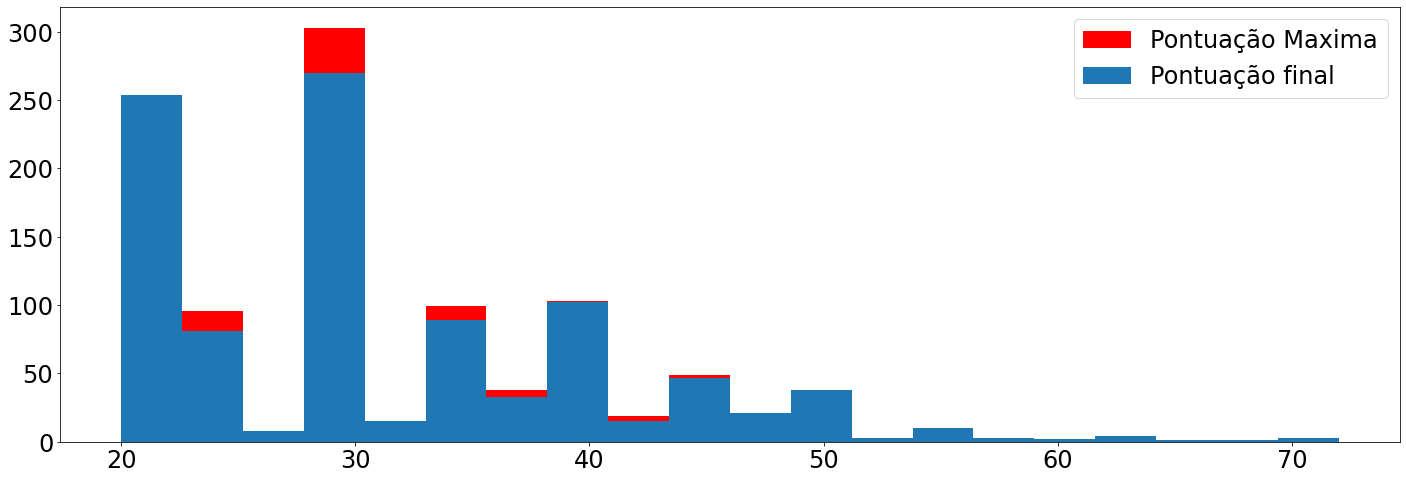

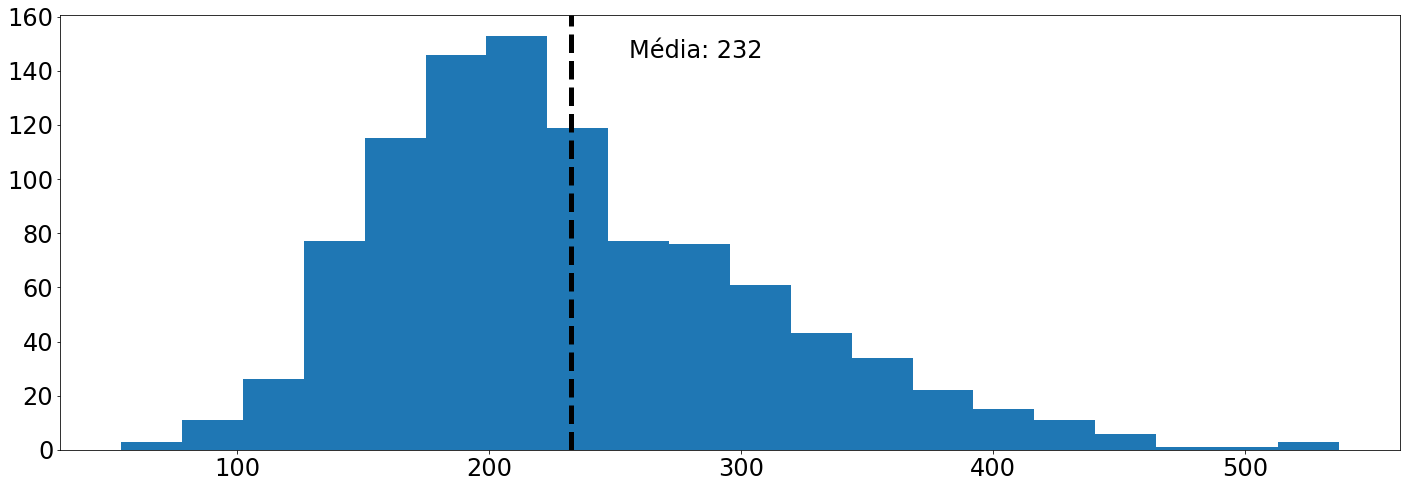

In [7]:
printIndfoGames('Random', pd.read_csv('/content/drive/MyDrive/Estudos/PUCRS/Ciencia de dados e Inteligencia Artificial/TCC/Memory Game/playing/history_random/2022-04-21T13-05-50/history.csv'))

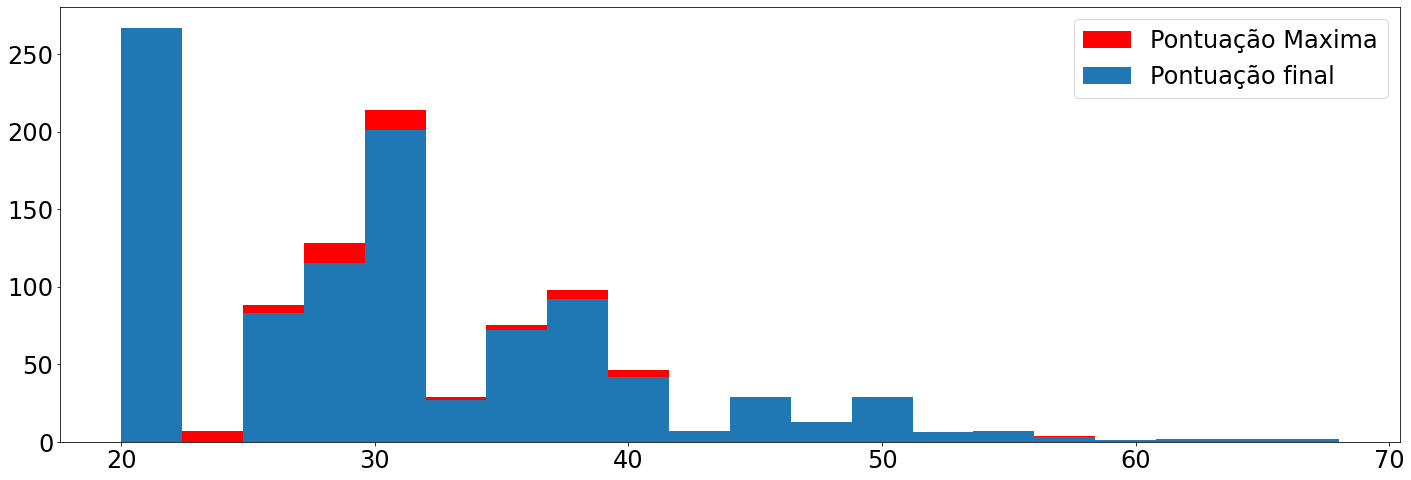

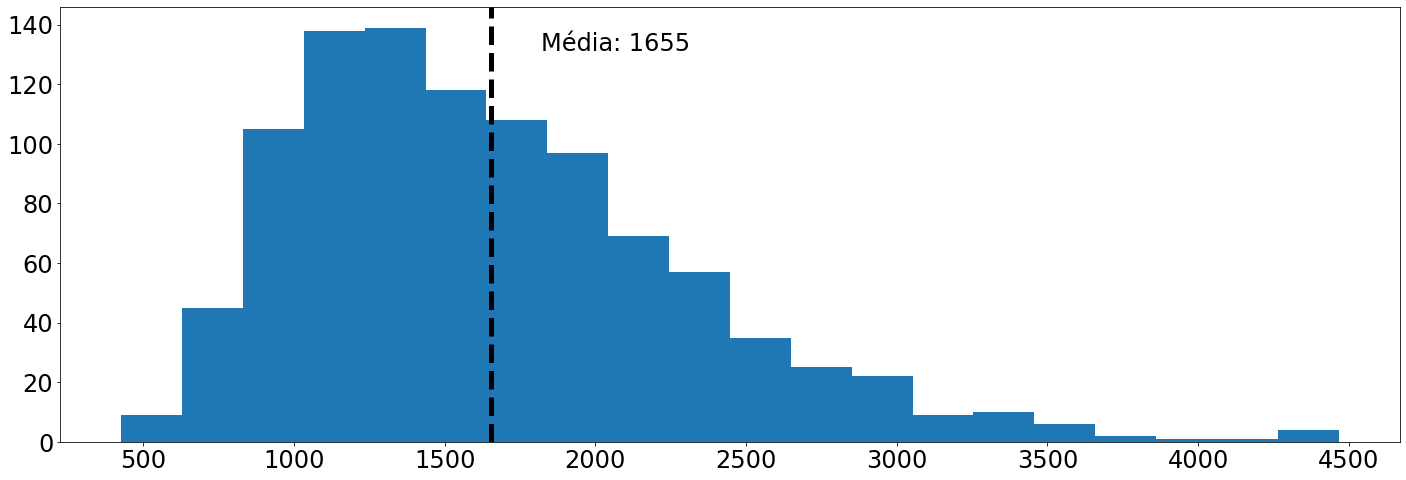

In [8]:
printIndfoGames('board-random-LSTM-bidirecional', pd.read_csv('/content/drive/MyDrive/Estudos/PUCRS/Ciencia de dados e Inteligencia Artificial/TCC/Memory Game/playing/history_net/2022-04-21T12-37-00/history.csv'))

# Full random training LSTM Bidirecional

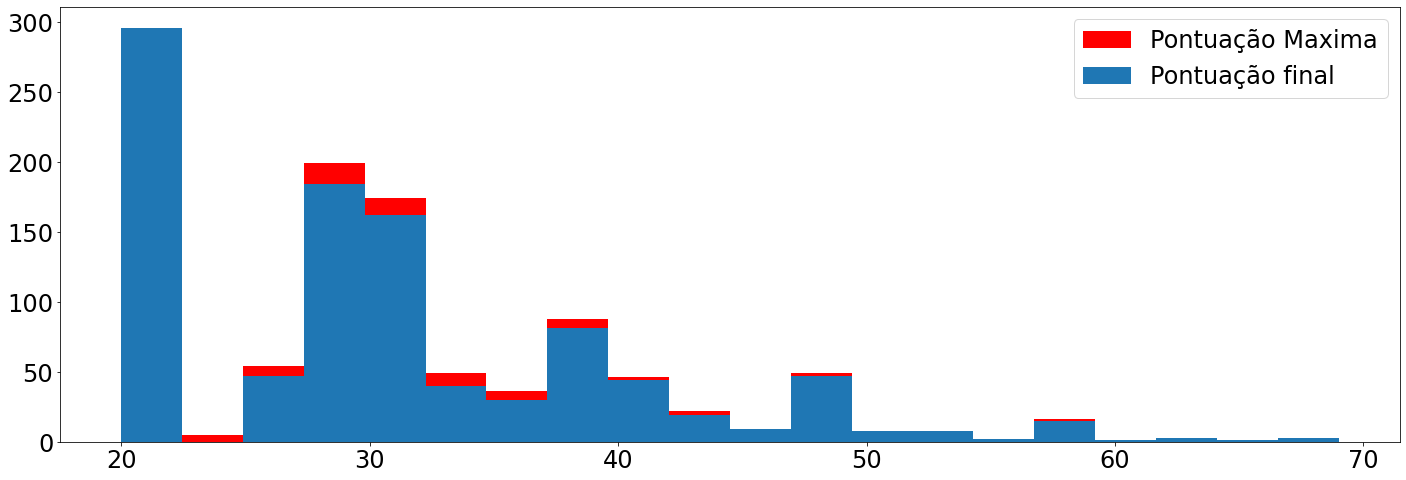

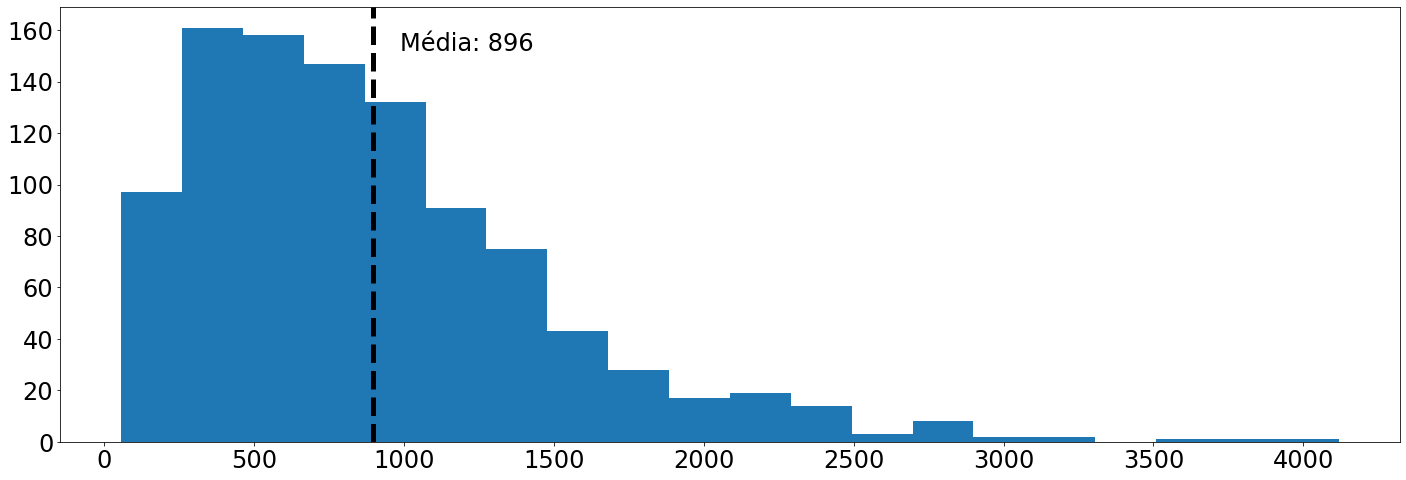

In [9]:
printIndfoGames('board-random-LSTM-bidirecional-beginning', pd.read_csv('/content/drive/MyDrive/Estudos/PUCRS/Ciencia de dados e Inteligencia Artificial/TCC/Memory Game/playing/history_net/2022-04-21T14-17-13/history.csv'))

# Random LSTM Bidirecional, start training

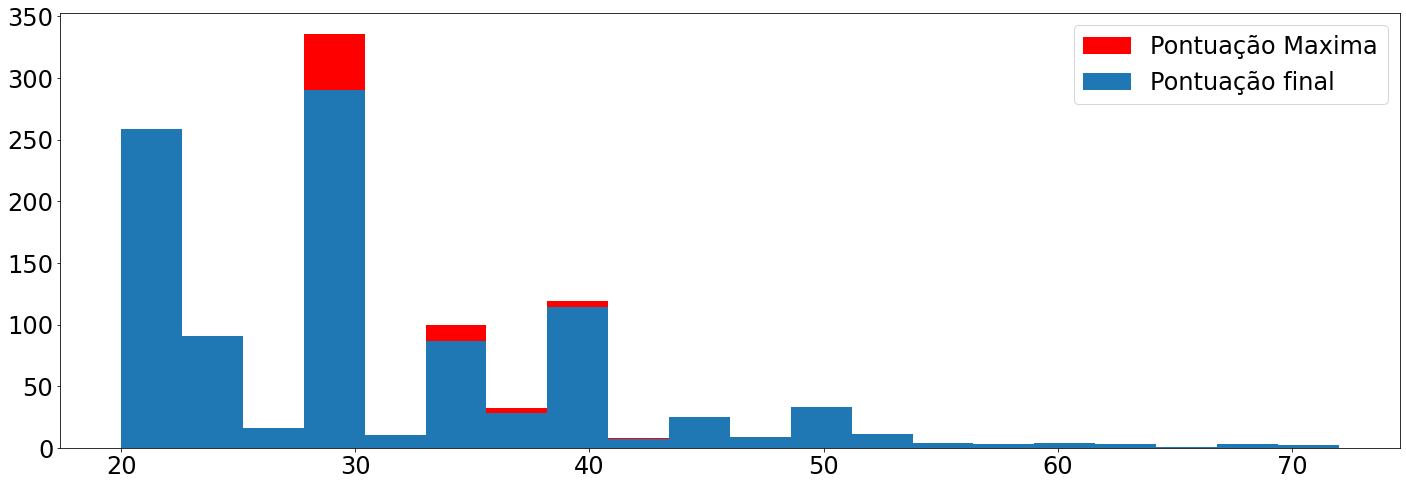

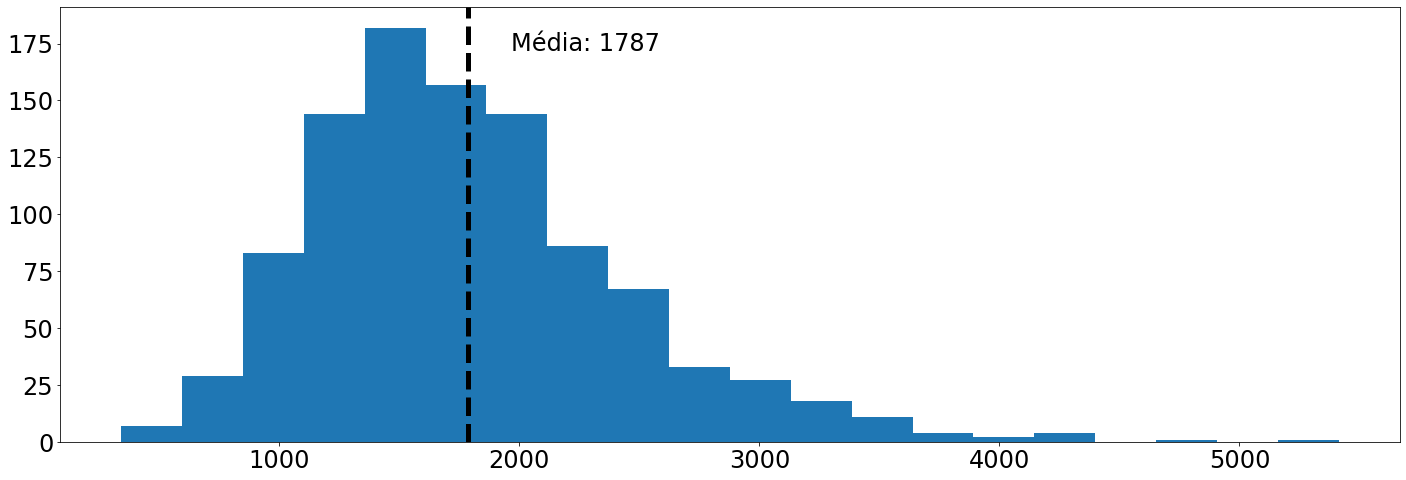

In [10]:
printIndfoGames('training-board-fixed-LSTM-bidirecional', pd.read_csv('/content/drive/MyDrive/Estudos/PUCRS/Ciencia de dados e Inteligencia Artificial/TCC/Memory Game/playing/history_net/2022-04-21T14-28-53/history.csv'))

# training-board-fixed-LSTM-bidirecional

# Probabilidades


A probabilidade de conseguir encontrar o par correto aleatoriamente é de:

Quadrado 4x4

\begin{align}
    P(A) = \frac{2}{16}
\end{align}

\begin{align}
    P(B) = \frac{1}{16}
\end{align}

\begin{align}
    P(A E B) = P(A) * P(B) = \frac{2}{16} * \frac{1}{16} = 0.0078125 = 0.78125\%
\end{align}

---

Quadrado 8x8

\begin{align}
    P(A) = \frac{2}{64}
\end{align}

\begin{align}
    P(B) = \frac{1}{64}
\end{align}

\begin{align}
    P(A E B) = P(A) * P(B) = \frac{2}{64} * \frac{1}{64} = 0.00048828125 = 0.0488\%
\end{align}

---

Quadrado 10x10

\begin{align}
    P(A) = \frac{2}{100}
\end{align}

\begin{align}
    P(B) = \frac{1}{100}
\end{align}

\begin{align}
    P(A E B) = P(A) * P(B) = \frac{2}{100} * \frac{1}{100} = 0.0002 = 0.02\%
\end{align}

---

Quadrado 12x12

\begin{align}
    P(A) = \frac{2}{144}
\end{align}

\begin{align}
    P(B) = \frac{1}{144}
\end{align}

\begin{align}
    P(A E B) = P(A) * P(B) = \frac{2}{144} * \frac{1}{144} = 0.000096 = 0.0096\%
\end{align}

---

Quadrado 16x16

\begin{align}
    P(A) = \frac{2}{256}
\end{align}

\begin{align}
    P(B) = \frac{1}{256}
\end{align}

\begin{align}
    P(A E B) = P(A) * P(B) = \frac{2}{256} * \frac{1}{256} = 0.000030 = 0.0030\%
\end{align}
